In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Currently, this code is used for classification tasks with 2 classes only

In [43]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.75, random_state=40)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

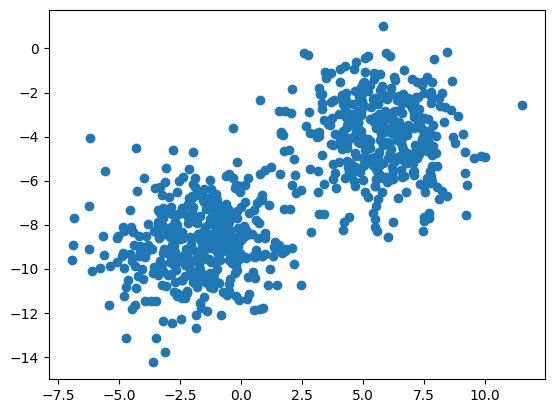

In [44]:
plt.scatter(X_train[:, 0], X_train[:, 1])

In [53]:
class SVM:
    def __init__(self, learning_rate = 0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0
    
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx]*(np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr*(2*self.lambda_param*self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr*y_[idx]
                    
    def predict(self, X):
        preds = X.dot(self.w) - self.b
        return np.where(preds<0, 0, 1)
    
        

In [54]:
clf = SVM()
clf.fit(X_train, Y_train)

In [55]:
preds = clf.predict(X_val)

In [57]:
len(preds[preds==Y_val])/len(Y_val)

0.98

In [58]:
weights = clf.w
biases = clf.b

In [66]:
conditions = np.where(X.dot(weights) - biases >0, True, False)